In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
file=pd.read_excel("Data_Train.xlsx")

In [3]:
file.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
file=file.drop(columns=["Additional_Info"])

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [6]:
# value _counts method is used to count the number of occurences in a particular dataset for specified column
file["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
#getting number of info about number of records and columns in a dataset
file.shape

(10683, 10)

In [8]:
# For dropping the Nan values or not empty values from dataset 
file.dropna(inplace=True)
file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


In [9]:
file.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [10]:
# For extracting the day from date using pd.to_datetime() function
file["Journey_Day"]=pd.to_datetime(file.Date_of_Journey,format="%d/%m/%Y").dt.day
file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1


In [11]:
# For extracting the month from date using pd.to_datetime() function
file["Journey_Month"]=pd.to_datetime(file.Date_of_Journey,format="%d/%m/%Y").dt.month
file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3


In [12]:
# For extracting the year from date using pd.to_datetime() function
file["Journey_Year"]=pd.to_datetime(file.Date_of_Journey,format="%d/%m/%Y").dt.year
file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3,2019


In [13]:
# Now drop the column Date_of_Journey from the dataset
file=file.drop(columns=["Date_of_Journey"]) 
file

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3,2019


In [14]:
#Now extracting the Dept_time hours and minutes

file["Dep_hours"]=pd.to_datetime(file.Dep_Time).dt.hour
file["Dep_Minutes"]=pd.to_datetime(file.Dep_Time).dt.minute
file=file.drop(columns=["Dep_Time"])
file

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,12648,1,3,2019,11,30


In [15]:
#Now extracting the Arrival_time hours and minutes

# file["Arrival_hours"]=pd.to_datetime(file.Arrival_Time).dt.hour
# file["Arrival_Minutes"]=pd.to_datetime(file.Arrival_Time).dt.minute
# file=file.drop(columns=["Arrival_Seconds"])
file.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,3873,24,6,2019,9,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,10:25 13 Mar,15h 30m,1 stop,11087,12,3,2019,18,55
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,21h 5m,1 stop,22270,1,3,2019,8,0
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,10:25 13 Mar,25h 30m,1 stop,11087,12,3,2019,8,55
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:15,7h 50m,1 stop,8625,27,5,2019,11,25


In [16]:
Duration_hours = []
Duration_minutes = []

for i in file["Duration"]:
    time_parts = i.split()
    hours = 0
    minutes = 0
    
    for part in time_parts:
        if 'h' in part:
            hours = int(part.rstrip('h'))
        elif 'm' in part:
            minutes = int(part.rstrip('m'))
    
    Duration_hours.append(hours)
    Duration_minutes.append(minutes)

print(Duration_hours)
print(Duration_minutes)



[2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17, 2, 8, 3, 27, 7,

In [17]:
file["Duration_hours"]=Duration_hours
file["Duration_minutes"]=Duration_minutes
file=file.drop(columns=["Duration"])
file

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hours,Dep_Minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,13882,9,6,2019,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,13302,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,non-stop,4107,9,4,2019,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,non-stop,4145,27,4,2019,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,non-stop,7229,27,4,2019,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,non-stop,12648,1,3,2019,11,30,2,40


Now handling the categorical data 

1) Nominal Data -> data are not in any order --> OneHotEncoder is used
2) Ordinal Datam -> data is in order --> LabelEncoder is used



In [18]:
# Finding the counts of each airline from the given dataset

file.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

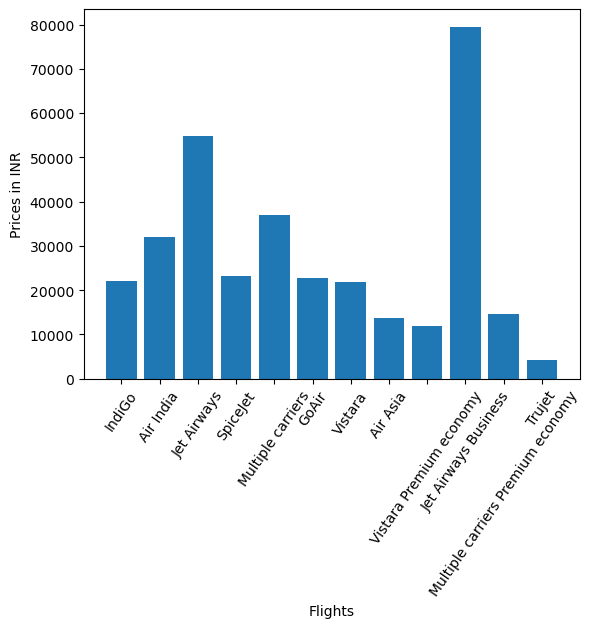

<Figure size 1400x600 with 0 Axes>

In [19]:
plt.bar(file.Airline,file.Price)
plt.ylabel("Prices in INR")
plt.xlabel("Flights")
plt.xticks(rotation=55)
plt.figure(figsize=(14,6)) 
plt.show()

In [20]:
sorted_data = file.sort_values('Price', ascending=False).reset_index(drop=True)

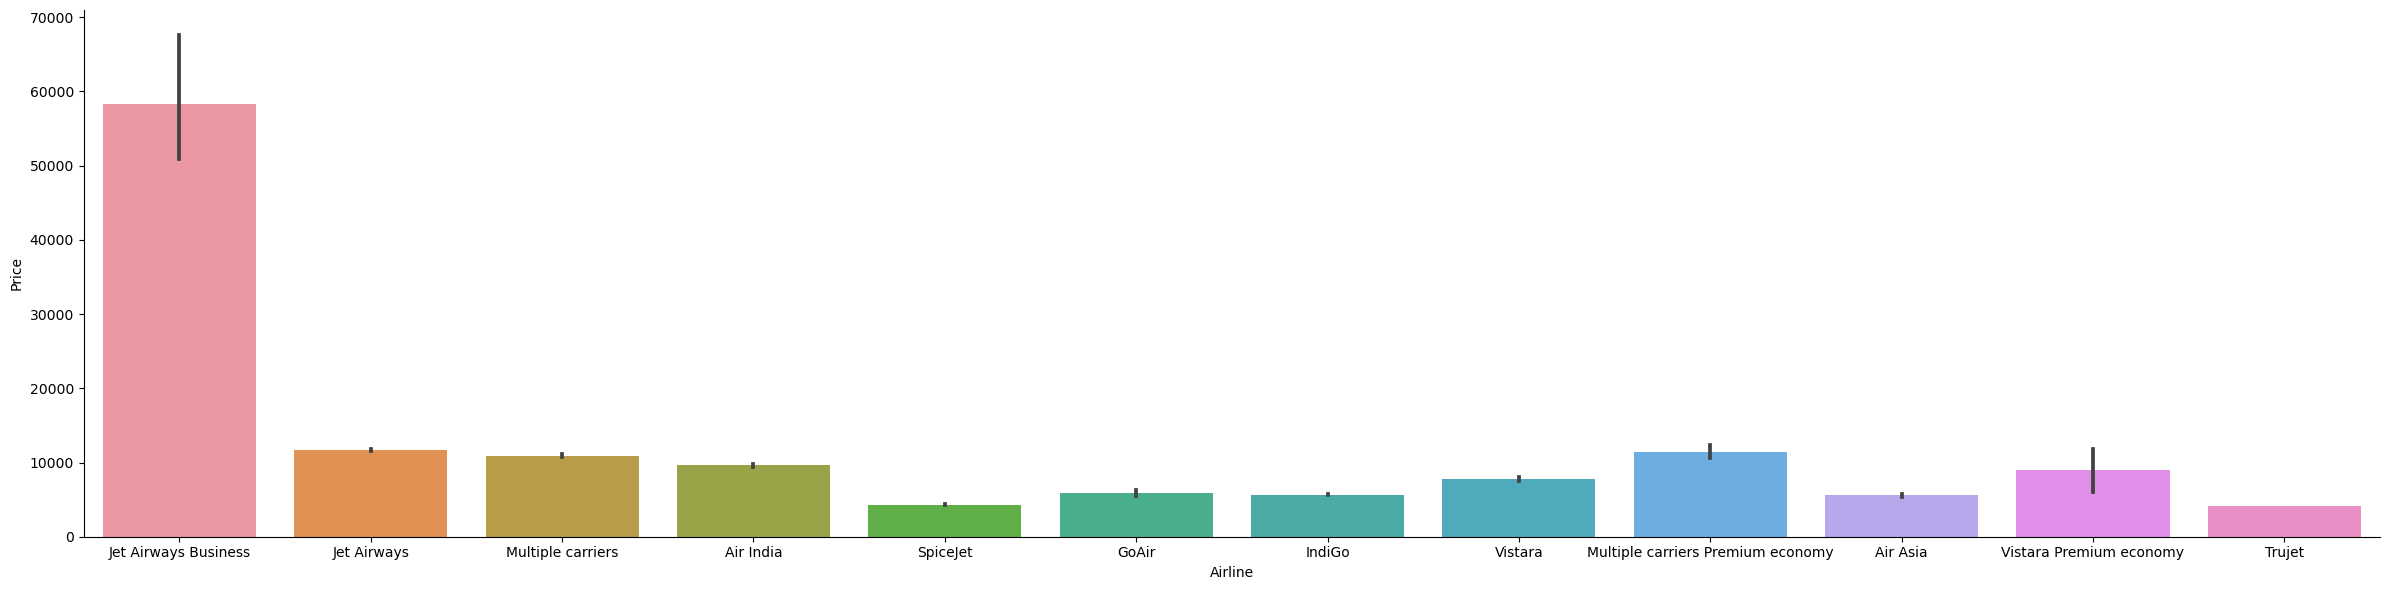

In [21]:
sn.catplot(y="Price",x="Airline",data=sorted_data,kind="bar", height=6, aspect=4)

In [22]:
#Performing OneHotEncoding on the airlines

# Using double square brackets [[ ]] returns a DataFrame, whereas using single brackets [ ] would return a Series in line 1 of this tab.

Airline=file[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head(10)


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0


In [23]:
file['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [24]:
# Perfroming OneHotEncoding in source column since it is nominal data ( one without in any order)
States=file[["Source"]]
States=pd.get_dummies(States,drop_first=True)
States.head(10)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,1,0,0


In [25]:
# Perfroming OneHotEncoding on destination column since it is nominal data ( one without in any order)
Destination=file[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head(10)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


In [26]:
file["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [27]:
file["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
# Using the LabelEncoder on Total_stops 
file.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
file

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hours,Dep_Minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2,13882,9,6,2019,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1,13302,1,3,2019,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,0,4107,9,4,2019,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,0,4145,27,4,2019,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,0,7229,27,4,2019,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,0,12648,1,3,2019,11,30,2,40


In [29]:
data_train=pd.concat([file,Airline,States,Destination],axis=1)
data_train.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,3897,24,3,2019,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,7662,1,5,2019,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2,13882,9,6,2019,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1,6218,12,5,2019,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1,13302,1,3,2019,...,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,0,3873,24,6,2019,...,0,0,0,1,0,0,0,0,0,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,10:25 13 Mar,1,11087,12,3,2019,...,0,0,0,0,0,0,0,0,0,1
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,1,22270,1,3,2019,...,0,0,0,0,0,0,0,0,0,1
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,10:25 13 Mar,1,11087,12,3,2019,...,0,0,0,0,0,0,0,0,0,1
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:15,1,8625,27,5,2019,...,0,0,1,0,0,1,0,0,0,0


In [30]:
data_train=data_train.drop(columns=["Airline","Source","Destination","Route","Arrival_Time"])
data_train

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hours,Dep_Minutes,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,11,30,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
Y=data_train['Price']
demo_data=data_train.drop(columns=['Price'])
X=demo_data
X

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hours,Dep_Minutes,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,19,55,2,30,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,2019,20,45,2,35,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,2019,8,20,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,2019,11,30,2,40,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [34]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

In [35]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [36]:
Y_pred=model.predict(X_test)
Y_pred

array([ 6324.98      ,  6753.15      ,  4177.19      , ...,
        8802.954     , 13412.22566667,  3661.705     ])

In [37]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [38]:
model.score(X_train,Y_train)

0.9569148224458802

In [39]:
model.score(X_test,Y_test)

0.8039324009212004

In [40]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
r2

0.8039324009212004

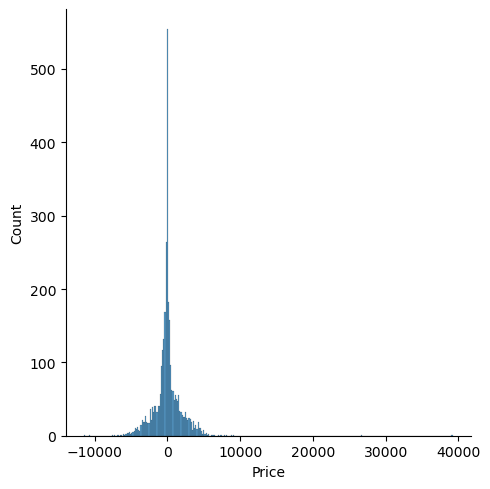

In [41]:
sn.displot(Y_test-Y_pred)

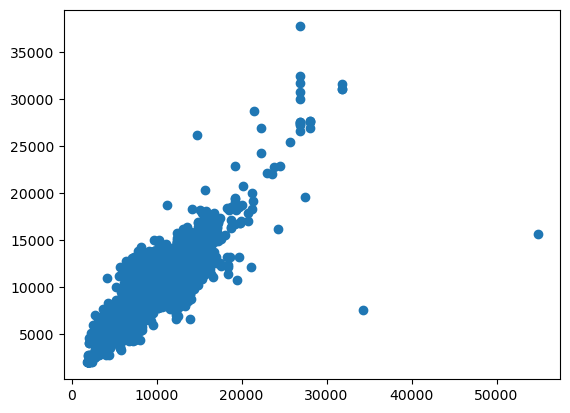

In [42]:
plt.scatter(Y_test,Y_pred)

In [43]:

from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [44]:
model2.fit(X_train,Y_train)

LinearRegression()

In [45]:
Y_pred=model2.predict(X_test)

In [46]:
model2.score(X_test,Y_test)

0.6050291885547813